In [1]:
import numpy as np
import pandas as pd
from statistics import mode
import matplotlib.pyplot as plt

In [2]:
credit=pd.read_csv("Credit_approval_Data.csv")
credit.head()

C:\Users\rauna\AppData\Local\Temp\ipykernel_19148\739767760.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  credit=pd.read_csv("Credit_approval_Data.csv")


,Unnamed: 0,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,0,263591,545710,20000.0,60 months,17.93,342.94,E,E5,Wylie ISD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1613916,69664096,30000.0,36 months,11.99,996.29,C,C1,Sergeant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,818934,8965180,21500.0,36 months,11.99,714.01,B,B3,Designer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1606612,70572960,10000.0,36 months,13.67,340.18,C,C3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1639932,68589517,5000.0,36 months,8.49,157.82,B,B1,Sr. Manufacturing Engineer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 135 entries, Unnamed: 0 to settlement_term
dtypes: float64(100), int64(2), object(33)
memory usage: 25.7+ MB


In [4]:
credit.dtypes

Unnamed: 0                 int64
id                         int64
member_id                 object
loan_amnt                float64
term                      object
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 135, dtype: object

In [5]:
credit.isnull().sum()

Unnamed: 0                   0
id                           0
member_id                    0
loan_amnt                    1
term                         1
                         ...  
settlement_status        24805
settlement_date          24805
settlement_amount        24805
settlement_percentage    24805
settlement_term          24805
Length: 135, dtype: int64

In [6]:
# Considering only those columns which have null values less than 45% in that particular column
credit = credit[credit.columns[((credit.isnull().sum())/25000) < 0.45]]
credit.shape

(25000, 78)

In [7]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 78 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  25000 non-null  int64  
 1   id                          25000 non-null  int64  
 2   member_id                   25000 non-null  object 
 3   loan_amnt                   24999 non-null  float64
 4   term                        24999 non-null  object 
 5   int_rate                    24999 non-null  float64
 6   installment                 24999 non-null  float64
 7   grade                       24999 non-null  object 
 8   sub_grade                   24999 non-null  object 
 9   emp_title                   23394 non-null  object 
 10  emp_length                  23498 non-null  object 
 11  home_ownership              24999 non-null  object 
 12  annual_inc                  24999 non-null  float64
 13  verification_status         249

In [8]:
credit.isnull().sum().sum()

40348

In [9]:
missdata=credit.isnull()

In [10]:
missdata

,Unnamed: 0,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24998,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [11]:
#Count missing values in each column

In [12]:
for column in missdata.columns.values.tolist():
    print(column)
    print (missdata[column].value_counts())
    print("")   

Unnamed: 0
False    25000
Name: Unnamed: 0, dtype: int64

id
False    25000
Name: id, dtype: int64

member_id
False    25000
Name: member_id, dtype: int64

loan_amnt
False    24999
True         1
Name: loan_amnt, dtype: int64

term
False    24999
True         1
Name: term, dtype: int64

int_rate
False    24999
True         1
Name: int_rate, dtype: int64

installment
False    24999
True         1
Name: installment, dtype: int64

grade
False    24999
True         1
Name: grade, dtype: int64

sub_grade
False    24999
True         1
Name: sub_grade, dtype: int64

emp_title
False    23394
True      1606
Name: emp_title, dtype: int64

emp_length
False    23498
True      1502
Name: emp_length, dtype: int64

home_ownership
False    24999
True         1
Name: home_ownership, dtype: int64

annual_inc
False    24999
True         1
Name: annual_inc, dtype: int64

verification_status
False    24999
True         1
Name: verification_status, dtype: int64

loan_status
False    24999
True         1
Nam

In [13]:
#Finding Categorical Columns and finding the missing values

In [14]:
cred_obj=credit.select_dtypes(include="object")

In [15]:
cred_obj

,member_id,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_credit_pull_d,application_type,hardship_flag
0,545710,60 months,E,E5,Wylie ISD,1 year,MORTGAGE,Verified,Charged Off,n,debt_consolidation,Todd's Loan,750xx,TX,1995-11-01 00:00:00,f,2016-10-01 00:00:00,Individual,N
1,69664096,36 months,C,C1,Sergeant,10+ years,MORTGAGE,Verified,Current,n,debt_consolidation,Debt consolidation,080xx,NJ,2003-10-01 00:00:00,f,2017-12-01 00:00:00,Individual,N
2,8965180,36 months,B,B3,Designer,1 year,RENT,Source Verified,Fully Paid,n,debt_consolidation,Debt Be Gone,760xx,TX,1999-10-01 00:00:00,w,2017-03-01 00:00:00,Individual,N
3,70572960,36 months,C,C3,NaN,NaN,RENT,Source Verified,Fully Paid,n,debt_consolidation,Debt consolidation,029xx,RI,1983-11-01 00:00:00,w,2017-12-01 00:00:00,Individual,N
4,68589517,36 months,B,B1,Sr. Manufacturing Engineer,10+ years,MORTGAGE,Source Verified,Current,n,debt_consolidation,Debt consolidation,301xx,GA,2000-04-01 00:00:00,w,2017-12-01 00:00:00,Individual,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,4974773,36 months,B,B1,Schneider Electric,5 years,MORTGAGE,Not Verified,Fully Paid,n,home_improvement,Front Porch & Wall Removal/Support,021xx,MA,1998-04-01 00:00:00,f,2017-03-01 00:00:00,Individual,N
24996,1279809,36 months,C,C1,Clark County School District,10+ years,RENT,Not Verified,Fully Paid,n,debt_consolidation,Consolidation Loan,891xx,NV,1995-07-01 00:00:00,f,2016-10-01 00:00:00,Individual,N
24997,63496281,36 months,C,C2,sales consultant,< 1 year,MORTGAGE,Source Verified,Late (31-120 days),n,debt_consolidation,Debt consolidation,325xx,FL,1996-12-01 00:00:00,f,2017-12-01 00:00:00,Individual,N
24998,98124387,60 months,C,C2,NaN,NaN,OWN,Not Verified,Current,n,debt_consolidation,Debt consolidation,010xx,MA,2002-05-01 00:00:00,w,2017-12-01 00:00:00,Individual,N


In [16]:
miss_obj=cred_obj.isnull()

In [17]:
for column in miss_obj.columns.values.tolist():
    print(column)
    print (miss_obj[column].value_counts())
    print("")

member_id
False    25000
Name: member_id, dtype: int64

term
False    24999
True         1
Name: term, dtype: int64

grade
False    24999
True         1
Name: grade, dtype: int64

sub_grade
False    24999
True         1
Name: sub_grade, dtype: int64

emp_title
False    23394
True      1606
Name: emp_title, dtype: int64

emp_length
False    23498
True      1502
Name: emp_length, dtype: int64

home_ownership
False    24999
True         1
Name: home_ownership, dtype: int64

verification_status
False    24999
True         1
Name: verification_status, dtype: int64

loan_status
False    24999
True         1
Name: loan_status, dtype: int64

pymnt_plan
False    24999
True         1
Name: pymnt_plan, dtype: int64

purpose
False    24999
True         1
Name: purpose, dtype: int64

title
False    24633
True       367
Name: title, dtype: int64

zip_code
False    24999
True         1
Name: zip_code, dtype: int64

addr_state
False    24999
True         1
Name: addr_state, dtype: int64

earliest_cr_l

In [18]:
cred_int=credit.select_dtypes(include="int")

In [19]:
cred_int

,Unnamed: 0,id
0,0,263591
1,1,1613916
2,2,818934
3,3,1606612
4,4,1639932
...,...,...
24995,24995,901888
24996,24996,945413
24997,24997,366944
24998,24998,1043529


In [20]:
"""
The above columns are of no use. So we will delete them.

"""

'\nThe above columns are of no use. So we will delete them.\n\n'

In [21]:
credit=credit.drop(cred_int,axis=1)

In [22]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 76 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   25000 non-null  object 
 1   loan_amnt                   24999 non-null  float64
 2   term                        24999 non-null  object 
 3   int_rate                    24999 non-null  float64
 4   installment                 24999 non-null  float64
 5   grade                       24999 non-null  object 
 6   sub_grade                   24999 non-null  object 
 7   emp_title                   23394 non-null  object 
 8   emp_length                  23498 non-null  object 
 9   home_ownership              24999 non-null  object 
 10  annual_inc                  24999 non-null  float64
 11  verification_status         24999 non-null  object 
 12  loan_status                 24999 non-null  object 
 13  pymnt_plan                  249

In [23]:
#Counting missing values in Numeric Columns

In [24]:
cred_num=credit.select_dtypes(include="float")

In [25]:
cred_num

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,20000.0,17.93,342.94,44304.0,18.47,0.0,690.0,694.0,0.0,6.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,30000.0,11.99,996.29,136000.0,20.63,3.0,670.0,674.0,1.0,12.0,...,1.0,1.0,90.0,25.0,1.0,0.0,116075.0,69594.0,27500.0,83175.0
2,21500.0,11.99,714.01,50000.0,29.62,0.0,735.0,739.0,1.0,13.0,...,0.0,1.0,100.0,50.0,0.0,0.0,116920.0,74939.0,19700.0,78020.0
3,10000.0,13.67,340.18,64400.0,16.68,3.0,675.0,679.0,0.0,9.0,...,0.0,3.0,80.0,50.0,0.0,0.0,39547.0,16824.0,11200.0,25547.0
4,5000.0,8.49,157.82,88000.0,5.32,0.0,660.0,664.0,0.0,4.0,...,0.0,0.0,60.0,100.0,0.0,0.0,104310.0,7582.0,3300.0,13015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,10500.0,10.16,339.60,78000.0,9.58,0.0,685.0,689.0,1.0,11.0,...,0.0,1.0,96.0,25.0,0.0,0.0,263503.0,40380.0,13000.0,33279.0
24996,12000.0,14.33,412.06,82000.0,11.75,0.0,690.0,694.0,1.0,13.0,...,0.0,3.0,100.0,40.0,0.0,0.0,64327.0,64497.0,5400.0,51027.0
24997,25000.0,12.69,838.63,60000.0,13.34,1.0,665.0,669.0,1.0,12.0,...,0.0,1.0,90.2,33.3,0.0,0.0,183700.0,22014.0,3600.0,0.0
24998,12200.0,13.49,280.66,44400.0,10.59,0.0,695.0,699.0,0.0,5.0,...,0.0,2.0,100.0,33.3,0.0,0.0,22500.0,13615.0,20000.0,1000.0


In [26]:
miss_num=cred_num.isnull()

In [27]:
miss_num

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
for column in miss_num.columns.values.tolist():
    print(column)
    print (miss_num[column].value_counts())
    print("")   

loan_amnt
False    24999
True         1
Name: loan_amnt, dtype: int64

int_rate
False    24999
True         1
Name: int_rate, dtype: int64

installment
False    24999
True         1
Name: installment, dtype: int64

annual_inc
False    24999
True         1
Name: annual_inc, dtype: int64

dti
False    24988
True        12
Name: dti, dtype: int64

delinq_2yrs
False    24998
True         2
Name: delinq_2yrs, dtype: int64

fico_range_low
False    24999
True         1
Name: fico_range_low, dtype: int64

fico_range_high
False    24999
True         1
Name: fico_range_high, dtype: int64

inq_last_6mths
False    24998
True         2
Name: inq_last_6mths, dtype: int64

open_acc
False    24998
True         2
Name: open_acc, dtype: int64

pub_rec
False    24998
True         2
Name: pub_rec, dtype: int64

revol_bal
False    24999
True         1
Name: revol_bal, dtype: int64

revol_util
False    24983
True        17
Name: revol_util, dtype: int64

total_acc
False    24998
True         2
Name: total_a

In [29]:
#Filling the missing values of numerical variables using mean
#Filling the missing values of categorical variables using mode

In [30]:
credit.fillna(cred_num.mean(),inplace=True)

In [31]:
credit.fillna(mode(cred_obj),inplace=True)

In [32]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 76 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   25000 non-null  object 
 1   loan_amnt                   25000 non-null  float64
 2   term                        25000 non-null  object 
 3   int_rate                    25000 non-null  float64
 4   installment                 25000 non-null  float64
 5   grade                       25000 non-null  object 
 6   sub_grade                   25000 non-null  object 
 7   emp_title                   25000 non-null  object 
 8   emp_length                  25000 non-null  object 
 9   home_ownership              25000 non-null  object 
 10  annual_inc                  25000 non-null  float64
 11  verification_status         25000 non-null  object 
 12  loan_status                 25000 non-null  object 
 13  pymnt_plan                  250

In [33]:
credit.isnull()

,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
credit.head(15)

,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag
0,545710,20000.0,60 months,17.93,342.94,E,E5,Wylie ISD,1 year,MORTGAGE,...,2.08864,93.843342,45.936996,0.0,0.0,176191.785006,50892.040689,21874.365791,43129.290132,N
1,69664096,30000.0,36 months,11.99,996.29,C,C1,Sergeant,10+ years,MORTGAGE,...,1.00000,90.000000,25.000000,1.0,0.0,116075.000000,69594.000000,27500.000000,83175.000000,N
2,8965180,21500.0,36 months,11.99,714.01,B,B3,Designer,1 year,RENT,...,1.00000,100.000000,50.000000,0.0,0.0,116920.000000,74939.000000,19700.000000,78020.000000,N
3,70572960,10000.0,36 months,13.67,340.18,C,C3,member_id,member_id,RENT,...,3.00000,80.000000,50.000000,0.0,0.0,39547.000000,16824.000000,11200.000000,25547.000000,N
4,68589517,5000.0,36 months,8.49,157.82,B,B1,Sr. Manufacturing Engineer,10+ years,MORTGAGE,...,0.00000,60.000000,100.000000,0.0,0.0,104310.000000,7582.000000,3300.000000,13015.000000,N
5,107370446,16150.0,60 months,30.74,529.88,F,F5,Meat and produce unloader,10+ years,RENT,...,2.00000,100.000000,0.000000,0.0,0.0,64635.000000,46857.000000,11400.000000,41935.000000,N
6,114228157,18400.0,36 months,14.08,629.59,C,C3,Owner,8 years,RENT,...,2.00000,100.000000,12.500000,0.0,0.0,49719.000000,21706.000000,42400.000000,0.000000,N
7,35511139,17350.0,60 months,12.39,389.37,C,C1,Dual Rate Pit manager,9 years,MORTGAGE,...,2.00000,100.000000,33.300000,0.0,0.0,194914.000000,49402.000000,4300.000000,61588.000000,N
8,91060858,35000.0,36 months,12.79,1175.76,C,C1,Business Manaer,9 years,MORTGAGE,...,4.00000,97.900000,64.300000,0.0,0.0,625456.000000,116751.000000,97800.000000,22200.000000,N
9,1454308,9325.0,36 months,10.16,301.60,B,B1,Glynn County Board of Education,5 years,MORTGAGE,...,2.08864,93.843342,45.936996,0.0,0.0,176191.785006,62797.000000,0.000000,43129.290132,N


PART2: FEATURE SELECTION

In [35]:
cred_X=credit.drop('loan_status',axis=1)
cred_Y=credit['loan_status']

In [36]:
cred_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 75 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   25000 non-null  object 
 1   loan_amnt                   25000 non-null  float64
 2   term                        25000 non-null  object 
 3   int_rate                    25000 non-null  float64
 4   installment                 25000 non-null  float64
 5   grade                       25000 non-null  object 
 6   sub_grade                   25000 non-null  object 
 7   emp_title                   25000 non-null  object 
 8   emp_length                  25000 non-null  object 
 9   home_ownership              25000 non-null  object 
 10  annual_inc                  25000 non-null  float64
 11  verification_status         25000 non-null  object 
 12  pymnt_plan                  25000 non-null  object 
 13  purpose                     250

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cred_X.select_dtypes(include='object').columns:
    cred_X[col]=le.fit_transform(cred_X[col].astype(str))    

In [38]:
cred_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 75 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   25000 non-null  int32  
 1   loan_amnt                   25000 non-null  float64
 2   term                        25000 non-null  int32  
 3   int_rate                    25000 non-null  float64
 4   installment                 25000 non-null  float64
 5   grade                       25000 non-null  int32  
 6   sub_grade                   25000 non-null  int32  
 7   emp_title                   25000 non-null  int32  
 8   emp_length                  25000 non-null  int32  
 9   home_ownership              25000 non-null  int32  
 10  annual_inc                  25000 non-null  float64
 11  verification_status         25000 non-null  int32  
 12  pymnt_plan                  25000 non-null  int32  
 13  purpose                     250

In [39]:
"""
We will apply Variance Threshold as our first feature selection technique but this works only in numerical variables.
However we will do this only on the independent vars.
"""

'\nWe will apply Variance Threshold as our first feature selection technique but this works only in numerical variables.\nHowever we will do this only on the independent vars.\n'

In [40]:
X=cred_X
y=cred_Y

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [42]:
X_train.shape, X_test.shape

((18750, 75), (6250, 75))

In [43]:
from sklearn.feature_selection import VarianceThreshold
var_th=VarianceThreshold(threshold=0)
var_th.fit(X_train)

VarianceThreshold(threshold=0)

In [44]:
var_th.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [45]:
const_col= [column for column in X_train.columns
            if column not in X_train.columns[var_th.get_support()]]

In [46]:
print(len(const_col))

1


In [47]:
for feature in const_col:
    print(feature)

policy_code


In [48]:
credit1=credit.drop(const_col,axis=1)
credit1

,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag
0,545710,20000.0,60 months,17.93,342.94,E,E5,Wylie ISD,1 year,MORTGAGE,...,2.08864,93.843342,45.936996,0.0,0.0,176191.785006,50892.040689,21874.365791,43129.290132,N
1,69664096,30000.0,36 months,11.99,996.29,C,C1,Sergeant,10+ years,MORTGAGE,...,1.00000,90.000000,25.000000,1.0,0.0,116075.000000,69594.000000,27500.000000,83175.000000,N
2,8965180,21500.0,36 months,11.99,714.01,B,B3,Designer,1 year,RENT,...,1.00000,100.000000,50.000000,0.0,0.0,116920.000000,74939.000000,19700.000000,78020.000000,N
3,70572960,10000.0,36 months,13.67,340.18,C,C3,member_id,member_id,RENT,...,3.00000,80.000000,50.000000,0.0,0.0,39547.000000,16824.000000,11200.000000,25547.000000,N
4,68589517,5000.0,36 months,8.49,157.82,B,B1,Sr. Manufacturing Engineer,10+ years,MORTGAGE,...,0.00000,60.000000,100.000000,0.0,0.0,104310.000000,7582.000000,3300.000000,13015.000000,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,4974773,10500.0,36 months,10.16,339.60,B,B1,Schneider Electric,5 years,MORTGAGE,...,1.00000,96.000000,25.000000,0.0,0.0,263503.000000,40380.000000,13000.000000,33279.000000,N
24996,1279809,12000.0,36 months,14.33,412.06,C,C1,Clark County School District,10+ years,RENT,...,3.00000,100.000000,40.000000,0.0,0.0,64327.000000,64497.000000,5400.000000,51027.000000,N
24997,63496281,25000.0,36 months,12.69,838.63,C,C2,sales consultant,< 1 year,MORTGAGE,...,1.00000,90.200000,33.300000,0.0,0.0,183700.000000,22014.000000,3600.000000,0.000000,N
24998,98124387,12200.0,60 months,13.49,280.66,C,C2,member_id,member_id,OWN,...,2.00000,100.000000,33.300000,0.0,0.0,22500.000000,13615.000000,20000.000000,1000.000000,N


In [49]:
"""
Here we will use pearson correlation as feature selection technique i.e we will be reducing multicollinearity.

"""

'\nHere we will use pearson correlation as feature selection technique i.e we will be reducing multicollinearity.\n\n'

In [50]:
X=credit1.drop('loan_status',axis=1)
y=credit1['loan_status']

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col]=le.fit_transform(X[col].astype(str))  

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [53]:
X_train.shape, X_test.shape

((18750, 74), (6250, 74))

In [54]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(X_train,value):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > value: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [55]:
corr_features=correlation(X_train,0.8)
len(set(corr_features))

20

In [56]:
corr_features

{'avg_cur_bal',
 'bc_util',
 'fico_range_high',
 'grade',
 'hardship_flag',
 'installment',
 'last_fico_range_low',
 'mo_sin_old_rev_tl_op',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'percent_bc_gt_75',
 'sub_grade',
 'tot_hi_cred_lim',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'total_rev_hi_lim'}

In [57]:
credit2=credit1.drop(corr_features,axis=1)

In [58]:
credit2.shape

(25000, 55)

In [59]:
"""
Now we will use Mutual Information Estimation as another feature selection technique
"""

'\nNow we will use Mutual Information Estimation as another feature selection technique\n'

In [60]:
X=credit2.drop("loan_status",axis=1)
Y=credit["loan_status"]

In [61]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col]=le.fit_transform(X[col].astype(str))  

In [62]:
X.dtypes

member_id                       int32
loan_amnt                     float64
term                            int32
int_rate                      float64
emp_title                       int32
emp_length                      int32
home_ownership                  int32
annual_inc                    float64
verification_status             int32
pymnt_plan                      int32
purpose                         int32
title                           int32
zip_code                        int32
addr_state                      int32
dti                           float64
delinq_2yrs                   float64
earliest_cr_line                int32
fico_range_low                float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status             int32
last_credit_pull_d              int32
last_fico_ra

In [63]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   25000 non-null  int32  
 1   loan_amnt                   25000 non-null  float64
 2   term                        25000 non-null  int32  
 3   int_rate                    25000 non-null  float64
 4   emp_title                   25000 non-null  int32  
 5   emp_length                  25000 non-null  int32  
 6   home_ownership              25000 non-null  int32  
 7   annual_inc                  25000 non-null  float64
 8   verification_status         25000 non-null  int32  
 9   pymnt_plan                  25000 non-null  int32  
 10  purpose                     25000 non-null  int32  
 11  title                       25000 non-null  int32  
 12  zip_code                    25000 non-null  int32  
 13  addr_state                  250

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [65]:
from sklearn.feature_selection import mutual_info_classif
mi=mutual_info_classif(X_train,y_train)
mi

array([0.1531856 , 0.0135292 , 0.00604103, 0.19072453, 0.02910669,
       0.00466911, 0.        , 0.00045189, 0.00220401, 0.00114352,
       0.00726245, 0.07471584, 0.00592797, 0.00152036, 0.        ,
       0.00736882, 0.0065434 , 0.00993778, 0.0073006 , 0.00525295,
       0.00600476, 0.        , 0.00177402, 0.00588948, 0.03778723,
       0.29130432, 0.19753677, 0.00187264, 0.00402373, 0.        ,
       0.02741311, 0.03810626, 0.031531  , 0.0254124 , 0.00477609,
       0.        , 0.02163772, 0.03965779, 0.03331463, 0.02681234,
       0.02448756, 0.00897087, 0.0367683 , 0.04136363, 0.04661494,
       0.03938989, 0.01410105, 0.03856794, 0.03201607, 0.031714  ,
       0.04275715, 0.0005168 , 0.        , 0.02365444])

In [66]:
mi=pd.Series(mi)
mi.index=X_train.columns
mi.sort_values(ascending=False)

last_credit_pull_d            0.291304
last_fico_range_high          0.197537
int_rate                      0.190725
member_id                     0.153186
title                         0.074716
num_bc_tl                     0.046615
pct_tl_nvr_dlq                0.042757
num_actv_bc_tl                0.041364
mo_sin_rcnt_rev_tl_op         0.039658
num_il_tl                     0.039390
num_tl_30dpd                  0.038568
tot_cur_bal                   0.038106
initial_list_status           0.037787
num_accts_ever_120_pd         0.036768
mo_sin_rcnt_tl                0.033315
num_tl_90g_dpd_24m            0.032016
num_tl_op_past_12m            0.031714
acc_open_past_24mths          0.031531
emp_title                     0.029107
tot_coll_amt                  0.027413
mort_acc                      0.026812
bc_open_to_buy                0.025412
mths_since_recent_bc          0.024488
total_bal_ex_mort             0.023654
mo_sin_old_il_acct            0.021638
num_tl_120dpd_2m         

<AxesSubplot:>

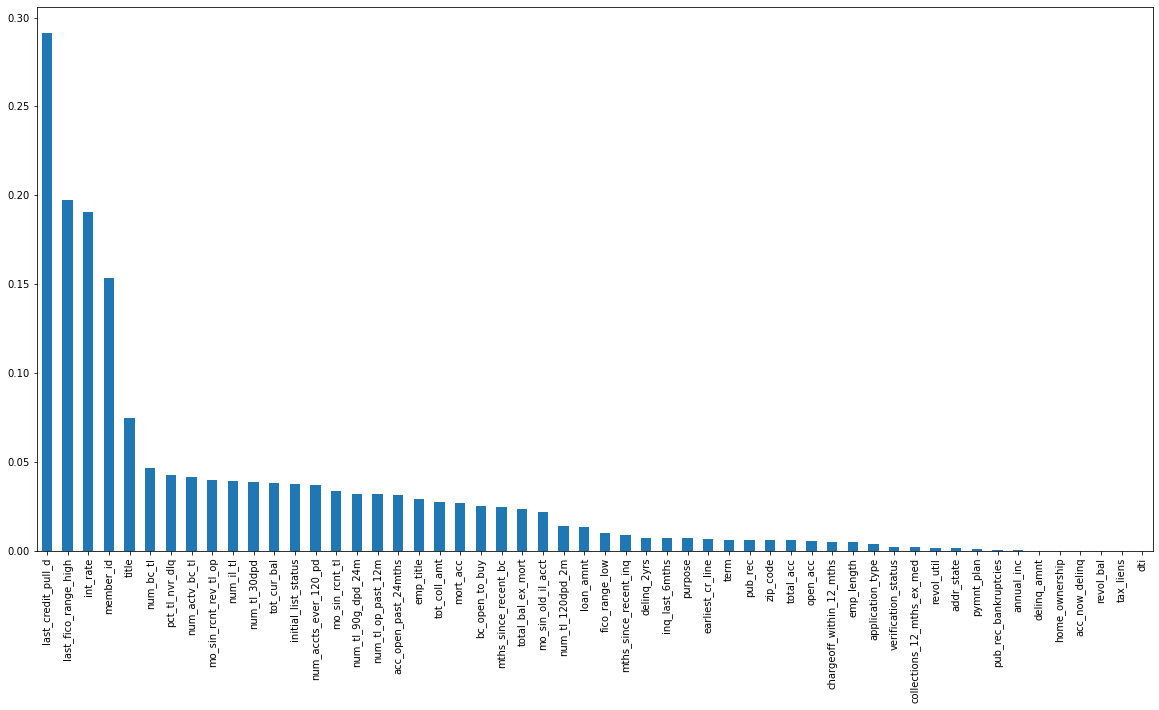

In [67]:
mi.sort_values(ascending=False).plot.bar(figsize=(20,10))

In [68]:
a=mi.sort_values(ascending=False)
for cols in a.iteritems():
    print(cols)  

('last_credit_pull_d', 0.29130432304010956)
('last_fico_range_high', 0.19753676933451114)
('int_rate', 0.19072452640547022)
('member_id', 0.15318560144528548)
('title', 0.07471584332955317)
('num_bc_tl', 0.04661493708056663)
('pct_tl_nvr_dlq', 0.04275714722442636)
('num_actv_bc_tl', 0.04136362670253302)
('mo_sin_rcnt_rev_tl_op', 0.039657790460961406)
('num_il_tl', 0.03938988884228589)
('num_tl_30dpd', 0.038567943773886615)
('tot_cur_bal', 0.03810625969741377)
('initial_list_status', 0.037787229724289384)
('num_accts_ever_120_pd', 0.03676830126704922)
('mo_sin_rcnt_tl', 0.033314631135193506)
('num_tl_90g_dpd_24m', 0.032016067693387606)
('num_tl_op_past_12m', 0.03171399878064607)
('acc_open_past_24mths', 0.03153100281410803)
('emp_title', 0.0291066911177722)
('tot_coll_amt', 0.02741311466762042)
('mort_acc', 0.026812338902390653)
('bc_open_to_buy', 0.025412400829634585)
('mths_since_recent_bc', 0.024487558710124313)
('total_bal_ex_mort', 0.023654437425649988)
('mo_sin_old_il_acct', 0.021

In [69]:
from sklearn.feature_selection import SelectKBest
mi_cols=SelectKBest(mutual_info_classif,k=20)
mi_cols.fit(X_train,y_train)
X_train=X_train.columns[mi_cols.get_support()]

In [70]:
X_train.shape

(20,)

In [71]:
X_train

Index(['member_id', 'int_rate', 'title', 'initial_list_status',
       'last_credit_pull_d', 'last_fico_range_high', 'tot_coll_amt',
       'tot_cur_bal', 'acc_open_past_24mths', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_bc_tl', 'num_il_tl', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'pct_tl_nvr_dlq'],
      dtype='object')

In [72]:
feature_final=['member_id', 'int_rate', 'emp_title', 'title', 'initial_list_status',
       'last_credit_pull_d', 'last_fico_range_high', 'tot_coll_amt',
       'tot_cur_bal', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_bc_tl', 'num_il_tl',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq','loan_status']

In [73]:
credit_final=credit[feature_final]

In [74]:
credit_final

,member_id,int_rate,emp_title,title,initial_list_status,last_credit_pull_d,last_fico_range_high,tot_coll_amt,tot_cur_bal,mo_sin_rcnt_rev_tl_op,...,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_tl,num_il_tl,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,loan_status
0,545710,17.93,Wylie ISD,Todd's Loan,f,2016-10-01 00:00:00,594.0,254.37152,142628.633981,13.68153,...,1.646865,0.522879,3.686239,7.91161,8.577263,0.004001,0.092349,2.08864,93.843342,Charged Off
1,69664096,11.99,Sergeant,Debt consolidation,f,2017-12-01 00:00:00,739.0,0.00000,69594.000000,21.00000,...,3.000000,1.000000,3.000000,7.00000,12.000000,0.000000,1.000000,1.00000,90.000000,Current
2,8965180,11.99,Designer,Debt Be Gone,w,2017-03-01 00:00:00,704.0,0.00000,74939.000000,17.00000,...,2.000000,0.000000,3.000000,7.00000,15.000000,0.000000,0.000000,1.00000,100.000000,Fully Paid
3,70572960,13.67,member_id,Debt consolidation,w,2017-12-01 00:00:00,669.0,0.00000,16824.000000,3.00000,...,1.000000,0.000000,3.000000,11.00000,2.000000,0.000000,0.000000,3.00000,80.000000,Fully Paid
4,68589517,8.49,Sr. Manufacturing Engineer,Debt consolidation,w,2017-12-01 00:00:00,699.0,537.00000,77053.000000,14.00000,...,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.00000,60.000000,Current
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,4974773,10.16,Schneider Electric,Front Porch & Wall Removal/Support,f,2017-03-01 00:00:00,744.0,0.00000,243142.000000,24.00000,...,4.000000,0.000000,4.000000,11.00000,11.000000,0.000000,0.000000,1.00000,96.000000,Fully Paid
24996,1279809,14.33,Clark County School District,Consolidation Loan,f,2016-10-01 00:00:00,549.0,0.00000,64497.000000,1.00000,...,0.000000,0.000000,3.000000,8.00000,9.000000,0.000000,0.000000,3.00000,100.000000,Fully Paid
24997,63496281,12.69,sales consultant,Debt consolidation,f,2017-12-01 00:00:00,609.0,2957.00000,150935.000000,2.00000,...,4.000000,0.000000,2.000000,10.00000,24.000000,0.000000,0.000000,1.00000,90.200000,Late (31-120 days)
24998,98124387,13.49,member_id,Debt consolidation,w,2017-12-01 00:00:00,699.0,0.00000,13615.000000,8.00000,...,0.000000,0.000000,2.000000,4.00000,9.000000,0.000000,0.000000,2.00000,100.000000,Current


In [75]:
credit_final.shape

(25000, 21)

In [76]:
credit_final.head()

,member_id,int_rate,emp_title,title,initial_list_status,last_credit_pull_d,last_fico_range_high,tot_coll_amt,tot_cur_bal,mo_sin_rcnt_rev_tl_op,...,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_tl,num_il_tl,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,loan_status
0,545710,17.93,Wylie ISD,Todd's Loan,f,2016-10-01 00:00:00,594.0,254.37152,142628.633981,13.68153,...,1.646865,0.522879,3.686239,7.91161,8.577263,0.004001,0.092349,2.08864,93.843342,Charged Off
1,69664096,11.99,Sergeant,Debt consolidation,f,2017-12-01 00:00:00,739.0,0.00000,69594.000000,21.00000,...,3.000000,1.000000,3.000000,7.00000,12.000000,0.000000,1.000000,1.00000,90.000000,Current
2,8965180,11.99,Designer,Debt Be Gone,w,2017-03-01 00:00:00,704.0,0.00000,74939.000000,17.00000,...,2.000000,0.000000,3.000000,7.00000,15.000000,0.000000,0.000000,1.00000,100.000000,Fully Paid
3,70572960,13.67,member_id,Debt consolidation,w,2017-12-01 00:00:00,669.0,0.00000,16824.000000,3.00000,...,1.000000,0.000000,3.000000,11.00000,2.000000,0.000000,0.000000,3.00000,80.000000,Fully Paid
4,68589517,8.49,Sr. Manufacturing Engineer,Debt consolidation,w,2017-12-01 00:00:00,699.0,537.00000,77053.000000,14.00000,...,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.00000,60.000000,Current


In [77]:
resp=credit_final['loan_status']

In [78]:
resp.unique()

array(['Charged Off', 'Current', 'Fully Paid', 'Late (31-120 days)',
       'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Default',
       'member_id'], dtype=object)

In [79]:
credit_final.head()

,member_id,int_rate,emp_title,title,initial_list_status,last_credit_pull_d,last_fico_range_high,tot_coll_amt,tot_cur_bal,mo_sin_rcnt_rev_tl_op,...,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_tl,num_il_tl,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,loan_status
0,545710,17.93,Wylie ISD,Todd's Loan,f,2016-10-01 00:00:00,594.0,254.37152,142628.633981,13.68153,...,1.646865,0.522879,3.686239,7.91161,8.577263,0.004001,0.092349,2.08864,93.843342,Charged Off
1,69664096,11.99,Sergeant,Debt consolidation,f,2017-12-01 00:00:00,739.0,0.00000,69594.000000,21.00000,...,3.000000,1.000000,3.000000,7.00000,12.000000,0.000000,1.000000,1.00000,90.000000,Current
2,8965180,11.99,Designer,Debt Be Gone,w,2017-03-01 00:00:00,704.0,0.00000,74939.000000,17.00000,...,2.000000,0.000000,3.000000,7.00000,15.000000,0.000000,0.000000,1.00000,100.000000,Fully Paid
3,70572960,13.67,member_id,Debt consolidation,w,2017-12-01 00:00:00,669.0,0.00000,16824.000000,3.00000,...,1.000000,0.000000,3.000000,11.00000,2.000000,0.000000,0.000000,3.00000,80.000000,Fully Paid
4,68589517,8.49,Sr. Manufacturing Engineer,Debt consolidation,w,2017-12-01 00:00:00,699.0,537.00000,77053.000000,14.00000,...,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.00000,60.000000,Current


In [80]:
credit_final=credit_final.drop('member_id', axis=1)

In [81]:
credit_final.head()

,int_rate,emp_title,title,initial_list_status,last_credit_pull_d,last_fico_range_high,tot_coll_amt,tot_cur_bal,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_tl,num_il_tl,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,loan_status
0,17.93,Wylie ISD,Todd's Loan,f,2016-10-01 00:00:00,594.0,254.37152,142628.633981,13.68153,8.161819,1.646865,0.522879,3.686239,7.91161,8.577263,0.004001,0.092349,2.08864,93.843342,Charged Off
1,11.99,Sergeant,Debt consolidation,f,2017-12-01 00:00:00,739.0,0.00000,69594.000000,21.00000,6.000000,3.000000,1.000000,3.000000,7.00000,12.000000,0.000000,1.000000,1.00000,90.000000,Current
2,11.99,Designer,Debt Be Gone,w,2017-03-01 00:00:00,704.0,0.00000,74939.000000,17.00000,8.000000,2.000000,0.000000,3.000000,7.00000,15.000000,0.000000,0.000000,1.00000,100.000000,Fully Paid
3,13.67,member_id,Debt consolidation,w,2017-12-01 00:00:00,669.0,0.00000,16824.000000,3.00000,3.000000,1.000000,0.000000,3.000000,11.00000,2.000000,0.000000,0.000000,3.00000,80.000000,Fully Paid
4,8.49,Sr. Manufacturing Engineer,Debt consolidation,w,2017-12-01 00:00:00,699.0,537.00000,77053.000000,14.00000,14.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.00000,60.000000,Current


In [82]:
credit_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   int_rate               25000 non-null  float64
 1   emp_title              25000 non-null  object 
 2   title                  25000 non-null  object 
 3   initial_list_status    25000 non-null  object 
 4   last_credit_pull_d     25000 non-null  object 
 5   last_fico_range_high   25000 non-null  float64
 6   tot_coll_amt           25000 non-null  float64
 7   tot_cur_bal            25000 non-null  float64
 8   mo_sin_rcnt_rev_tl_op  25000 non-null  float64
 9   mo_sin_rcnt_tl         25000 non-null  float64
 10  mort_acc               25000 non-null  float64
 11  num_accts_ever_120_pd  25000 non-null  float64
 12  num_actv_bc_tl         25000 non-null  float64
 13  num_bc_tl              25000 non-null  float64
 14  num_il_tl              25000 non-null  float64
 15  nu

In [83]:
#from pandas_profiling import ProfileReport

In [84]:
'''profile = ProfileReport(credit_final)
profile'''

'profile = ProfileReport(credit_final)\nprofile'

In [85]:
Y=credit_final['loan_status']

In [86]:
Y.values

array(['Charged Off', 'Current', 'Fully Paid', ..., 'Late (31-120 days)',
       'Current', 'Current'], dtype=object)

In [87]:
print(Y.unique())

['Charged Off' 'Current' 'Fully Paid' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off' 'Default'
 'member_id']


In [88]:
#Target Variable cleaning

In [89]:
data= credit_final[(credit_final["loan_status"]=='Late (16-30 days)') | (credit_final["loan_status"]=='Late (31-120 days)') | (credit_final["loan_status"]=='In Grace Period') | (credit_final["loan_status"]=='Late (31-120 days)') | (credit_final["loan_status"]=='Default') | (credit_final["loan_status"]=='member_id') | (credit_final["loan_status"]=='Does not meet the credit policy. Status:Fully Paid') | (credit_final["loan_status"]=='Does not meet the credit policy. Status:Charged Off') |  (credit_final["loan_status"]=='Current')].index

In [90]:
 credit_final.drop(data, inplace = True)

In [91]:
credit_final.head()

,int_rate,emp_title,title,initial_list_status,last_credit_pull_d,last_fico_range_high,tot_coll_amt,tot_cur_bal,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_tl,num_il_tl,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,loan_status
0,17.93,Wylie ISD,Todd's Loan,f,2016-10-01 00:00:00,594.0,254.37152,142628.633981,13.68153,8.161819,1.646865,0.522879,3.686239,7.91161,8.577263,0.004001,0.092349,2.08864,93.843342,Charged Off
2,11.99,Designer,Debt Be Gone,w,2017-03-01 00:00:00,704.0,0.00000,74939.000000,17.00000,8.000000,2.000000,0.000000,3.000000,7.00000,15.000000,0.000000,0.000000,1.00000,100.000000,Fully Paid
3,13.67,member_id,Debt consolidation,w,2017-12-01 00:00:00,669.0,0.00000,16824.000000,3.00000,3.000000,1.000000,0.000000,3.000000,11.00000,2.000000,0.000000,0.000000,3.00000,80.000000,Fully Paid
5,30.74,Meat and produce unloader,Debt consolidation,w,2017-12-01 00:00:00,544.0,0.00000,46857.000000,9.00000,1.000000,0.000000,0.000000,3.000000,4.00000,11.000000,0.000000,0.000000,2.00000,100.000000,Charged Off
8,12.79,Business Manaer,Credit card refinancing,f,2017-12-01 00:00:00,754.0,0.00000,558176.000000,9.00000,1.000000,6.000000,0.000000,13.000000,16.00000,5.000000,0.000000,0.000000,4.00000,97.900000,Fully Paid


In [92]:
credit_final['loan_status'].unique()

array(['Charged Off', 'Fully Paid'], dtype=object)

In [93]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in credit_final.select_dtypes(include='object').columns:
    credit_final[col]=le.fit_transform(credit_final[col].astype(str))  

In [154]:
credit_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12290 entries, 0 to 24996
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   int_rate               12290 non-null  float64
 1   emp_title              12290 non-null  int32  
 2   title                  12290 non-null  int32  
 3   initial_list_status    12290 non-null  int32  
 4   last_credit_pull_d     12290 non-null  int32  
 5   last_fico_range_high   12290 non-null  float64
 6   tot_coll_amt           12290 non-null  float64
 7   tot_cur_bal            12290 non-null  float64
 8   mo_sin_rcnt_rev_tl_op  12290 non-null  float64
 9   mo_sin_rcnt_tl         12290 non-null  float64
 10  mort_acc               12290 non-null  float64
 11  num_accts_ever_120_pd  12290 non-null  float64
 12  num_actv_bc_tl         12290 non-null  float64
 13  num_bc_tl              12290 non-null  float64
 14  num_il_tl              12290 non-null  float64
 15  nu

In [95]:
#Charged Off=0
#Fully Paid=1

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(credit_final)

array([[ 0.95508608,  1.07557656,  2.04206992, ..., -0.05484083,
        -0.04560704, -1.95100327],
       [-0.32025505, -1.0565032 , -0.57715424, ..., -0.67423791,
         0.71192587,  0.5125568 ],
       [ 0.04044749,  1.35646754, -0.27822105, ...,  0.46369054,
        -1.74893179,  0.5125568 ],
       ...,
       [-0.3889603 ,  0.54071151, -0.73729702, ..., -1.24320214,
         0.71192587,  0.5125568 ],
       [-0.71316318,  0.42783414,  0.09188672, ..., -0.67423791,
         0.21975433,  0.5125568 ],
       [ 0.18215206, -1.2848628 , -1.11452224, ...,  0.46369054,
         0.71192587,  0.5125568 ]])

In [97]:
#import seaborn as sns

In [98]:
#sns.pairplot(df, hue='loan_status')
#plt.figure(figsize=(10, 10))
#plt.show()

# Model Building:, Random Forest, XGBoost 

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X = credit_final.drop("loan_status", axis = 1)

In [101]:
Y = credit_final["loan_status"]

In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=1,test_size=0.2)

In [103]:
X.describe()

,int_rate,emp_title,title,initial_list_status,last_credit_pull_d,last_fico_range_high,tot_coll_amt,tot_cur_bal,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_tl,num_il_tl,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq
count,12290.000000,12290.000000,12290.000000,12290.000000,12290.000000,12290.000000,12290.000000,1.229000e+04,12290.000000,12290.000000,12290.00000,12290.000000,12290.000000,12290.000000,12290.000000,12290.000000,12290.000000,12290.000000,12290.000000
mean,13.481613,4144.533360,567.179902,0.489748,80.504068,676.551505,199.224522,1.409170e+05,13.054685,7.751014,1.75831,0.499609,3.602820,8.265115,8.660207,0.003326,0.091666,2.185027,94.214002
std,4.657767,2303.478459,281.010673,0.499915,11.357850,80.408175,1312.603636,1.488586e+05,16.113083,8.175841,2.02162,1.224180,2.044897,4.500249,7.096537,0.057676,0.496222,1.757651,8.127578
min,5.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.800000
25%,9.990000,2130.000000,420.000000,0.000000,77.000000,629.000000,0.000000,3.211300e+04,4.000000,3.000000,0.00000,0.000000,2.000000,5.000000,4.000000,0.000000,0.000000,1.000000,92.000000
50%,12.990000,4280.500000,489.000000,0.000000,85.000000,694.000000,0.000000,1.032750e+05,9.000000,6.000000,1.00000,0.000000,3.000000,7.911610,7.000000,0.000000,0.000000,2.000000,96.800000
75%,16.290000,6138.750000,637.750000,1.000000,88.000000,729.000000,0.000000,1.974665e+05,15.000000,9.000000,3.00000,0.522879,5.000000,10.000000,11.000000,0.000000,0.000000,3.000000,100.000000
max,30.990000,7775.000000,1555.000000,1.000000,89.000000,850.000000,56046.000000,2.484676e+06,315.000000,137.000000,22.00000,23.000000,21.000000,46.000000,81.000000,2.000000,19.000000,21.000000,100.000000


In [104]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [105]:
X_train_std = sc.fit_transform(X_train)

In [106]:
X_test_std = sc.transform(X_test)

In [107]:
X_train_std.shape

(9832, 19)

In [108]:
X_test_std.shape

(2458, 19)

In [109]:
from sklearn.metrics import mean_squared_error

In [110]:
from sklearn.metrics import mean_absolute_error

In [111]:
from sklearn.metrics import accuracy_score #for classification

In [112]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000)

In [113]:
rf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=1000)

In [114]:
Y_pred_rf = rf.predict(X_test)

In [115]:
Y_pred_rf

array([1, 1, 1, ..., 1, 1, 0])

In [116]:
print(accuracy_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.9210740439381611
0.07892595606183889
0.28093763731803345


In [117]:
#Identifying Overfitting in RF

In [118]:
print("training accuracy in RF=",accuracy_score(Y_train,rf.predict(X_train)))
print("testing accuracy in RF=",accuracy_score(Y_test,rf.predict(X_test)))

training accuracy in RF= 1.0
testing accuracy in RF= 0.9210740439381611


In [119]:
#XGBoost Classification

In [120]:
#!pip install xgboost

In [121]:
import xgboost as xgb

In [122]:
xgb_cl = xgb.XGBClassifier(n_estimators=10)

In [123]:
xgb_cl.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [124]:
Y_pred_xgb = xgb_cl.predict(X_test)

In [125]:
print(accuracy_score(Y_test,Y_pred_xgb))
print(mean_absolute_error(Y_test,Y_pred_xgb))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_xgb)))

0.9247355573637104
0.07526444263628966
0.2743436579115502


In [126]:
#Hyperparameter Tuning For XGB
from sklearn.model_selection import GridSearchCV

In [127]:
model = xgb_cl
n_estimators = [10, 100, 1000]

In [128]:
grid = dict(n_estimators=n_estimators)

In [129]:
grid_search_xgb = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

In [130]:
grid_search_xgb.fit(X_train, Y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=2, error_score=0,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()', n_es

In [131]:
print(f"Best: {grid_search_xgb.best_score_:.3f} using {grid_search_xgb.best_params_}")

Best: 0.463 using {'n_estimators': 10}


In [132]:
means = grid_search_xgb.cv_results_['mean_test_score']
stds = grid_search_xgb.cv_results_['std_test_score']
params = grid_search_xgb.cv_results_['params']

In [133]:
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

0.463 (0.010) with: {'n_estimators': 10}
0.458 (0.007) with: {'n_estimators': 100}
0.436 (0.004) with: {'n_estimators': 1000}


In [134]:
#Hyperparameter Tuning  Random Forest Classifier
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]

In [135]:
grid = dict(n_estimators=n_estimators)

In [136]:
grid_search_rf = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

In [137]:
grid_search_rf.fit(X_train, Y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=2, error_score=0, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 100, 1000]}, scoring='r2',
             verbose=2)

In [138]:
print(f"Best: {grid_search_rf.best_score_:.3f} using {grid_search_rf.best_params_}")

Best: 0.471 using {'n_estimators': 100}


In [139]:
means = grid_search_rf.cv_results_['mean_test_score']
stds = grid_search_rf.cv_results_['std_test_score']
params = grid_search_rf.cv_results_['params']

In [140]:
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

0.432 (0.006) with: {'n_estimators': 10}
0.471 (0.010) with: {'n_estimators': 100}
0.470 (0.012) with: {'n_estimators': 1000}


In [141]:
Loan_status_pred = xgb_cl.predict(X_train)

In [142]:
Loan_status_pred

array([1, 0, 1, ..., 1, 1, 1])

In [143]:
#Identifying Overfitting in XGBoost

In [144]:
print("training accuracy in XGBoost=",accuracy_score(Y_train,xgb_cl.predict(X_train)))
print("testing accuracy in XGBoost=",accuracy_score(Y_test,xgb_cl.predict(X_test)))

training accuracy in XGBoost= 0.9343978844589097
testing accuracy in XGBoost= 0.9247355573637104


# Model Evaluation for Random Forest

In [145]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
# Calculate roc_auc_score
roc_auc_rf=(roc_auc_score(Y_test, Y_pred_rf))
print(roc_auc_rf)

0.8821245856751694


In [146]:
# Calculate the confusion matrix
print(confusion_matrix(Y_test, Y_pred_rf))

[[ 419   95]
 [  99 1845]]


In [147]:
# Calculate the classification report
print(classification_report(Y_test, Y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       514
           1       0.95      0.95      0.95      1944

    accuracy                           0.92      2458
   macro avg       0.88      0.88      0.88      2458
weighted avg       0.92      0.92      0.92      2458



# Model Evaluation for XGBoost

In [148]:
# Calculate roc_auc_score
roc_auc_xgb=(roc_auc_score(Y_test, Y_pred_xgb))
print(roc_auc_xgb)

0.8923105714880467


In [149]:
# Calculate the confusion matrix
print(confusion_matrix(Y_test,Y_pred_xgb))

[[ 430   84]
 [ 101 1843]]


In [150]:
# Calculate the classification report
print(classification_report(Y_test, Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       514
           1       0.96      0.95      0.95      1944

    accuracy                           0.92      2458
   macro avg       0.88      0.89      0.89      2458
weighted avg       0.93      0.92      0.93      2458



In [151]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.figure(figsize=(10, 10))
    plt.plot(fpr, tpr, color='orange')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

# ROC Curve for RF

Random Forest Classifier AUC score: 0.8821245856751694


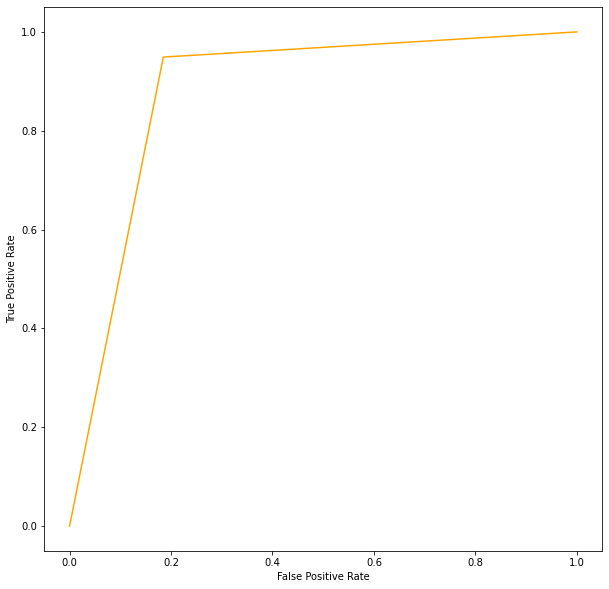

In [152]:
plot_roc_curve(Y_test, Y_pred_rf)
print(f'Random Forest Classifier AUC score: {roc_auc_score(Y_test, Y_pred_rf)}')

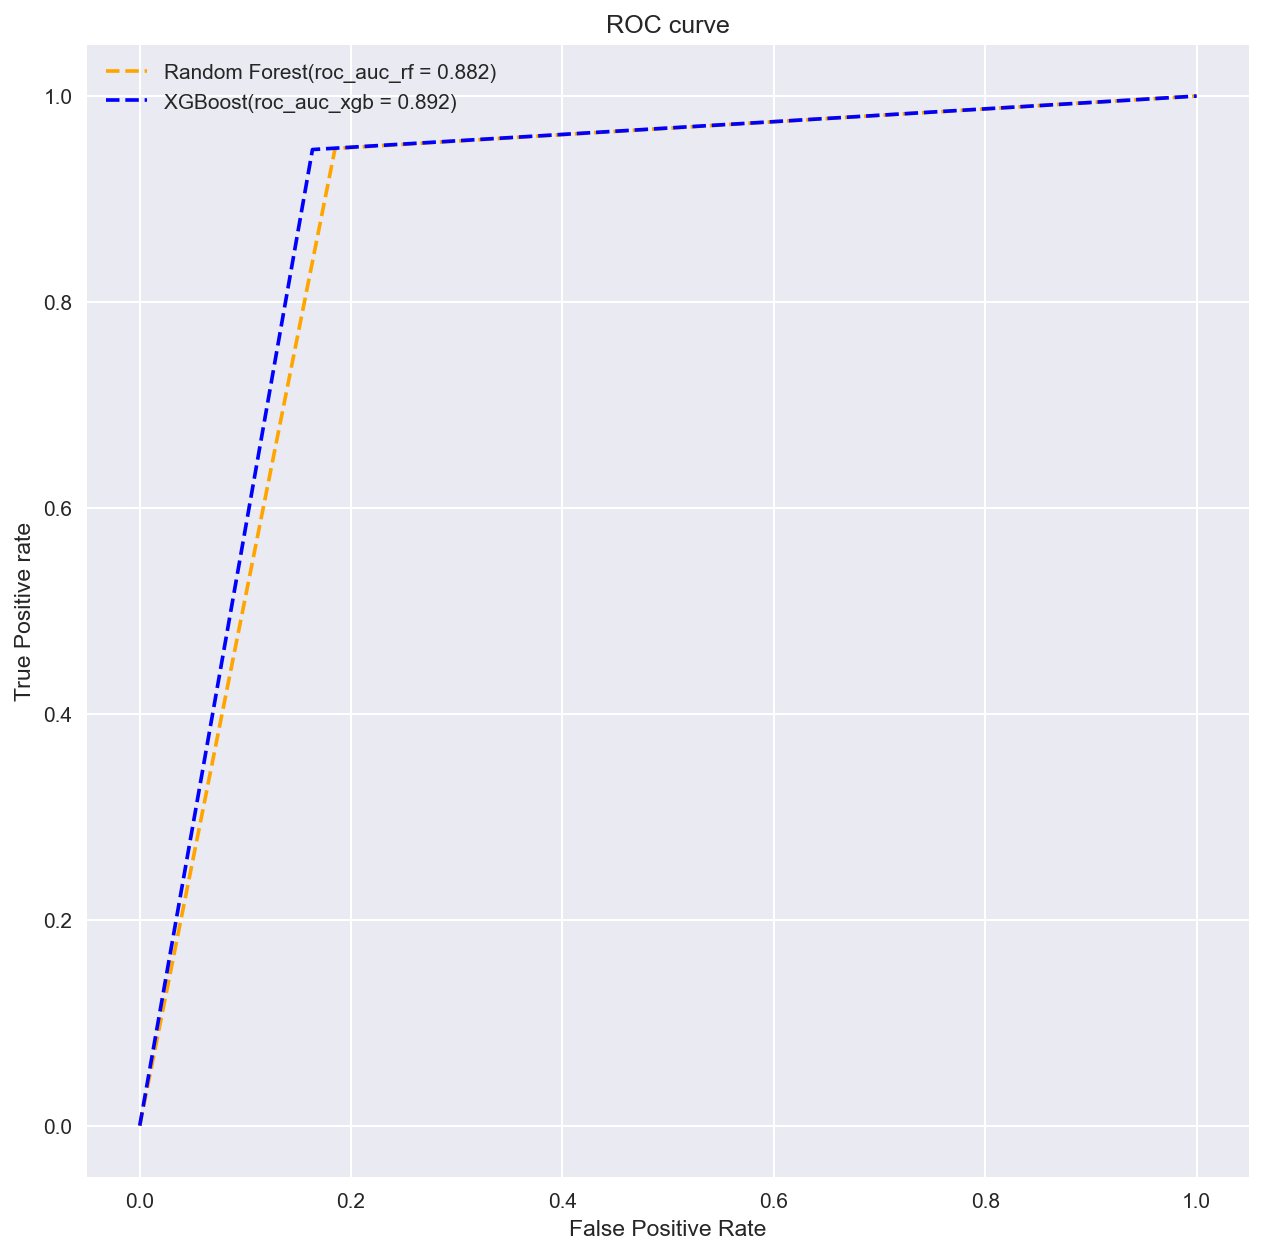

In [153]:
plt.style.use('seaborn')

fpr_rf, tpr_rf, thresh1 = roc_curve(Y_test, Y_pred_rf)
fpr_xgb, tpr_xgb, thresh2 = roc_curve(Y_test, Y_pred_xgb)
# plot roc curves
plt.figure(figsize=(10, 10),dpi=150)
plt.plot(fpr_rf, tpr_rf, linestyle='--',color='orange', label='Random Forest(roc_auc_rf = %0.3f)' % roc_auc_rf)
plt.plot(fpr_xgb, tpr_xgb, linestyle='--',color='blue', label='XGBoost(roc_auc_xgb = %0.3f)' % roc_auc_xgb)
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()